# K-Nearest Neighbors Classification

This notebook is created as part of my KNN learning.

### Objectives:
- To gain familiarity on Supervised machine learning
- To build classifier to predict service category for unknown cases
- Using the dataset with predefined labels provided by IBM learning course, build the model to predict class of new or unknown cases.

The target field, called __custcat__, has four possible service categories that correspond to the four customer groups, as follows:
1. Basic Service
2. E-Service
3. Plus Service
4. Total Service


### Install and Import required libraries

In [1]:
!pip install seaborn
!pip install scikit-learn

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
%matplotlib inline

### Load Data

In [3]:
df = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/data/teleCust1000t.csv')
df

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
0,2,13,44,1,9,64.0,4,5,0.0,0,2,1
1,3,11,33,1,7,136.0,5,5,0.0,0,6,4
2,3,68,52,1,24,116.0,1,29,0.0,1,2,3
3,2,33,33,0,12,33.0,2,0,0.0,1,1,1
4,2,23,30,1,9,30.0,1,2,0.0,0,4,3
...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,10,39,0,0,27.0,3,0,0.0,1,3,1
996,1,7,34,0,2,22.0,5,5,0.0,1,1,1
997,3,67,59,0,40,944.0,5,33,0.0,1,1,4
998,3,70,49,0,18,87.0,2,22,0.0,1,1,3


### Data Visualization and Analysis

In [4]:
df['custcat'].value_counts()

custcat
3    281
1    266
4    236
2    217
Name: count, dtype: int64

Visualize the correlation between features:  Examine the __correlation map__ to see how features related to each other.

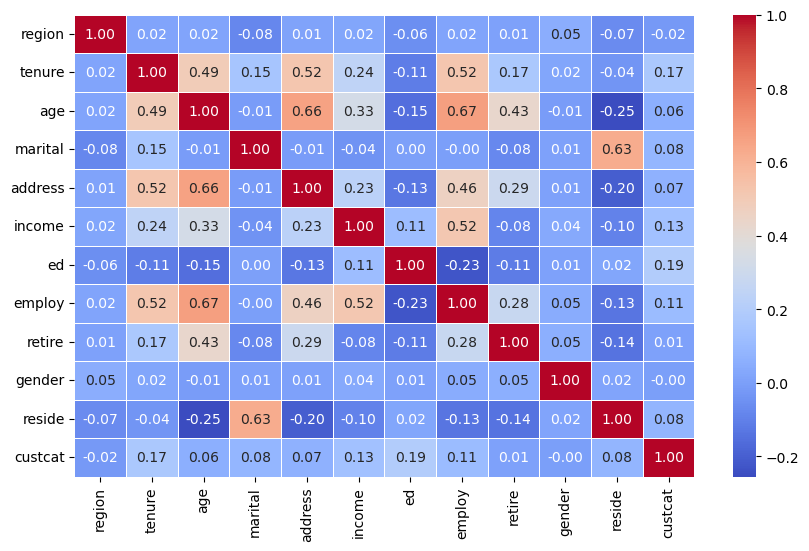

In [5]:
correlation_matrix = df.corr()
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.show()

In [6]:
correlation_values = abs(df.corr()['custcat'].drop('custcat')).sort_values(ascending=False)
correlation_values

ed         0.193864
tenure     0.166691
income     0.134525
employ     0.110011
marital    0.083836
reside     0.082022
address    0.067913
age        0.056909
region     0.023771
retire     0.008908
gender     0.004966
Name: custcat, dtype: float64

According the to data observed on correlation_values, features ed and tenure has the most effect on custcat. 

### Preparing Train, Test set

In [7]:
X = df.drop(['custcat'], axis=1)
X

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside
0,2,13,44,1,9,64.0,4,5,0.0,0,2
1,3,11,33,1,7,136.0,5,5,0.0,0,6
2,3,68,52,1,24,116.0,1,29,0.0,1,2
3,2,33,33,0,12,33.0,2,0,0.0,1,1
4,2,23,30,1,9,30.0,1,2,0.0,0,4
...,...,...,...,...,...,...,...,...,...,...,...
995,3,10,39,0,0,27.0,3,0,0.0,1,3
996,1,7,34,0,2,22.0,5,5,0.0,1,1
997,3,67,59,0,40,944.0,5,33,0.0,1,1
998,3,70,49,0,18,87.0,2,22,0.0,1,1


In [8]:
Y = df['custcat']
Y

0      1
1      4
2      3
3      1
4      3
      ..
995    1
996    1
997    4
998    3
999    2
Name: custcat, Length: 1000, dtype: int64

### Normalize Data
We need to normalize the data to ensure that all features contribute equally to the distance calculation.  It put all the features on the same scale.  
It helps KNN make better decision. 

In [9]:
X_norm = StandardScaler().fit_transform(X)

### Spliting Test data

In [10]:
X_train, X_test, Y_train, Y_test = train_test_split(X_norm, Y, test_size=0.3, random_state=4)

### Training model

In [11]:
#Train Model and Predict  
k = 4
k_classifier = KNeighborsClassifier(n_neighbors=k)
knn_model = k_classifier.fit(X_train,Y_train)

yhat = knn_model.predict(X_test)

### Model Evaluation

In [12]:
accuracy = accuracy_score(Y_test, yhat)
accuracy

0.33

In [13]:
# checking accuracy on different k value
k = 6 
knn_model1 = KNeighborsClassifier(n_neighbors = k).fit(X_train,Y_train)
yhat = knn_model1.predict(X_test)
print(f"Accuracy:  {accuracy_score(Y_test, yhat):.2f}") 

Accuracy:  0.32


In [14]:
# choosing the right k values
Ks = 10
acc = np.zeros((Ks))
std_acc = np.zeros((Ks))
for n in range(1,Ks+1):
    #Train Model and Predict  
    knn_model_n = KNeighborsClassifier(n_neighbors = n).fit(X_train,Y_train)
    yhat = knn_model_n.predict(X_test)
    acc[n-1] = accuracy_score(Y_test, yhat)
    std_acc[n-1] = np.std(yhat==Y_test)/np.sqrt(yhat.shape[0])

print( "The best accuracy was: ", acc.max(), " with k = ", acc.argmax()+1)

The best accuracy was:  0.34  with k =  5


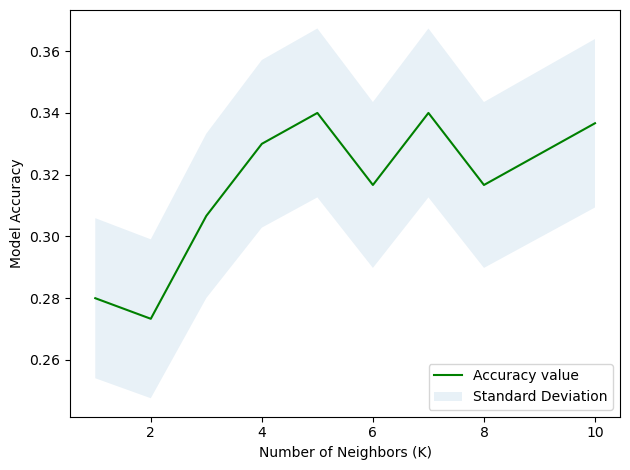

In [15]:
plt.plot(range(1,Ks+1),acc,'g')
plt.fill_between(range(1,Ks+1),acc - 1 * std_acc,acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy value', 'Standard Deviation'))
plt.ylabel('Model Accuracy')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()

In [16]:
# choosing the right k values
Ks = 100
acc = np.zeros((Ks))
std_acc = np.zeros((Ks))
for n in range(1,Ks+1):
    #Train Model and Predict  
    knn_model_n = KNeighborsClassifier(n_neighbors = n).fit(X_train,Y_train)
    yhat = knn_model_n.predict(X_test)
    acc[n-1] = accuracy_score(Y_test, yhat)
    std_acc[n-1] = np.std(yhat==Y_test)/np.sqrt(yhat.shape[0])

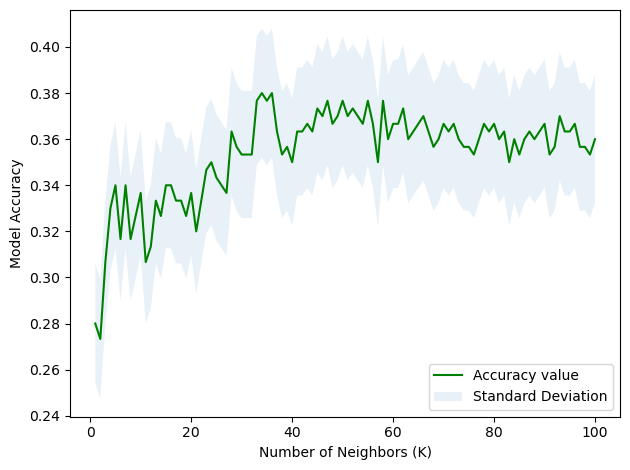

In [17]:
# Visualization k = 100
plt.plot(range(1,Ks+1),acc,'g')
plt.fill_between(range(1,Ks+1),acc - 1 * std_acc,acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy value', 'Standard Deviation'))
plt.ylabel('Model Accuracy')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()

In [18]:
print( "The best accuracy was: ", acc.max(), " with k = ", acc.argmax()+1)

The best accuracy was:  0.38  with k =  34


### Author

Potjamarn Arpornratn

Ref:  IBM Data Science lab works